In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = "/content/drive/My Drive/Programación/datanueva.csv"

In [ ]:
datos = pd.read_csv("/content/drive/My Drive/Programación/datanueva.csv", index_col="ID")

In [ ]:
# Mostrar filas nulas en columnas ‘Certificate’ y ‘Meta_score’

nulas_certificate = datos["Certificate"].isnull().sum()
nulas_meta = datos["Meta_score"].isnull().sum()

print("Filas nulas en Certificate: ", nulas_certificate)
print("Filas nulas en Meta_score: ", nulas_meta)

Filas nulas en Certificate:  101
Filas nulas en Meta_score:  157


In [ ]:
# Eliminar filas con nulos

datos_limpios = datos.dropna(subset=["Certificate","Meta_score"])
datos_limpios.head()

,Series_Title,Poster_Link,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
ID,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
2,The Godfather,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
3,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
4,The Godfather: Part II,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
5,12 Angry Men,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
# Obtener el promedio de los 10 primeros directores

diez_primeros_directores = datos_limpios["Director"].drop_duplicates().head(10)

meta_score = datos_limpios[datos_limpios["Director"].isin(diez_primeros_directores)]["Meta_score"]

promedio = meta_score.mean()
promedio

78.78125

a

In [ ]:
# Aplicar un filtro

def filtro_war(genre):
  return 'War' in genre

datos_war = datos_limpios[datos_limpios['Genre'].apply(filtro_war)]
nombres_war = datos_war[['Series_Title', 'IMDB_Rating', 'Meta_score']]
nombres_war.head()

,Series_Title,IMDB_Rating,Meta_score
ID,,,
25,Saving Private Ryan,8.6,91.0
47,Hotaru no haka,8.5,94.0
51,Casablanca,8.5,100.0
75,Apocalypse Now,8.4,94.0
81,Paths of Glory,8.4,90.0


TypeError: unhashable type: 'numpy.ndarray'

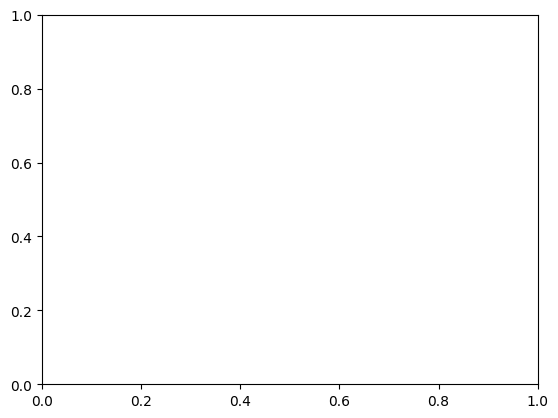

In [ ]:
# Grafico

nombres_war.head(10)


plt.bar(nombres_war, height=0.8, width=0.8, label='Barras')